<a href="https://colab.research.google.com/github/Mohammadhsiavash/Sentiment-analysis-with-NLP/blob/main/Sentiment_Analysis_of_Mental_health_posts_on_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install datasets
!pip install datasets
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.5 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
dataset = load_dataset('solomonk/reddit_mental_health_posts')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/solomonk___csv/solomonk--reddit_mental_health_posts-ebd98f1303b315a0/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url'],
        num_rows: 151288
    })
})

In [10]:
import pandas as pd
data = dataset['train']
df = pd.DataFrame(data)

In [11]:
df


,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.00,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.00,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.00,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.00,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.00,https://www.reddit.com/r/ADHD/comments/rmb8lm/...
...,...,...,...,...,...,...,...,...,...,...
151283,mesu2713,The rescheduling and the waiting and the sheer...,2019-07-07T20:33:17.000Z,cablf1,2,3,ptsd,Anybody out there still waiting for your day i...,0.81,https://www.reddit.com/r/ptsd/comments/cablf1/...
151284,mooki24,"I experienced a stressful, drawn out event rec...",2019-07-07T17:28:34.000Z,ca9dkd,1,2,ptsd,PTSD-like symptoms?,0.67,https://www.reddit.com/r/ptsd/comments/ca9dkd/...
151285,[deleted],[deleted],2019-07-07T16:43:09.000Z,ca8ucl,2,16,ptsd,"I posted on here months ago and was blind, but...",1.00,https://www.reddit.com/r/ptsd/comments/ca8ucl/...
151286,[deleted],[deleted],2019-07-07T16:31:35.000Z,ca8pou,0,4,ptsd,Just a friendly reminder using facts,0.84,https://www.reddit.com/r/ptsd/comments/ca8pou/...


<Axes: >

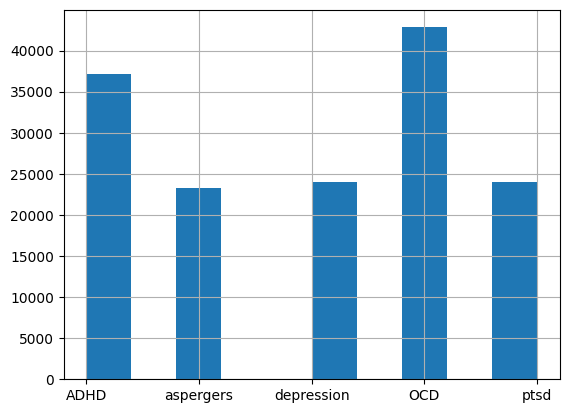

In [12]:
df.subreddit.hist()

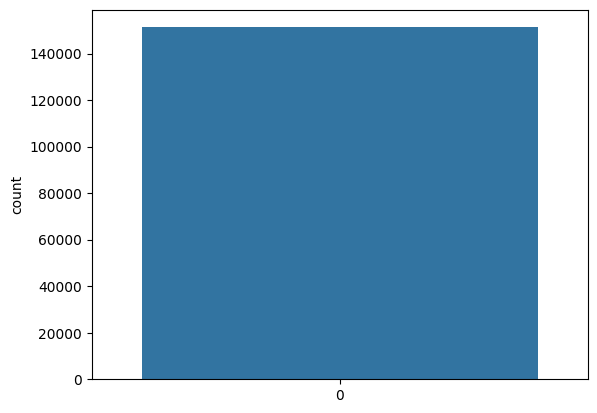

In [27]:
import matplotlib.pyplot as plt

import seaborn as sb
# df.score.plot()
sb.countplot(df.score)
plt.show()


In [33]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('deleted').any(), axis=1)]

In [34]:
df

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.00,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.00,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.00,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.00,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.00,https://www.reddit.com/r/ADHD/comments/rmb8lm/...
...,...,...,...,...,...,...,...,...,...,...
151277,marblepalace77,Do ppl with PTSD also get paranoia like BPD ( ...,2019-07-08T00:29:14.000Z,cae5de,2,1,ptsd,PTSD and BPD and psychosis,0.67,https://www.reddit.com/r/ptsd/comments/cae5de/...
151282,kittyKATchaos,"On the 4th of July, I got really intoxicated a...",2019-07-07T20:42:07.000Z,cabp52,6,3,ptsd,How to cope and heal after a tramatic experien...,0.81,https://www.reddit.com/r/ptsd/comments/cabp52/...
151283,mesu2713,The rescheduling and the waiting and the sheer...,2019-07-07T20:33:17.000Z,cablf1,2,3,ptsd,Anybody out there still waiting for your day i...,0.81,https://www.reddit.com/r/ptsd/comments/cablf1/...
151284,mooki24,"I experienced a stressful, drawn out event rec...",2019-07-07T17:28:34.000Z,ca9dkd,1,2,ptsd,PTSD-like symptoms?,0.67,https://www.reddit.com/r/ptsd/comments/ca9dkd/...


In [36]:
df.apply(lambda row: row.astype(str).str.contains('deleted').any(), axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
151277    False
151282    False
151283    False
151284    False
151287    False
Length: 97270, dtype: bool

In [37]:
df.apply(lambda row: row.astype(str).str.contains('removed').any(), axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
151277    False
151282    False
151283    False
151284    False
151287    False
Length: 97270, dtype: bool

In [38]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('removed').any(), axis=1)]

In [39]:
df

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.00,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.00,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.00,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.00,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.00,https://www.reddit.com/r/ADHD/comments/rmb8lm/...
...,...,...,...,...,...,...,...,...,...,...
151277,marblepalace77,Do ppl with PTSD also get paranoia like BPD ( ...,2019-07-08T00:29:14.000Z,cae5de,2,1,ptsd,PTSD and BPD and psychosis,0.67,https://www.reddit.com/r/ptsd/comments/cae5de/...
151282,kittyKATchaos,"On the 4th of July, I got really intoxicated a...",2019-07-07T20:42:07.000Z,cabp52,6,3,ptsd,How to cope and heal after a tramatic experien...,0.81,https://www.reddit.com/r/ptsd/comments/cabp52/...
151283,mesu2713,The rescheduling and the waiting and the sheer...,2019-07-07T20:33:17.000Z,cablf1,2,3,ptsd,Anybody out there still waiting for your day i...,0.81,https://www.reddit.com/r/ptsd/comments/cablf1/...
151284,mooki24,"I experienced a stressful, drawn out event rec...",2019-07-07T17:28:34.000Z,ca9dkd,1,2,ptsd,PTSD-like symptoms?,0.67,https://www.reddit.com/r/ptsd/comments/ca9dkd/...


In [43]:
df_1 = df[['body','subreddit']]

In [44]:
df_1

,body,subreddit
0,A few months ago I was accepted into this full...,ADHD
1,"Hey guys, I was curious if anyone else has the...",ADHD
2,\n\ni have 6 exams in the next 2 weeks one of...,ADHD
3,Is there anyone out there that is struggling w...,ADHD
4,"Whenever I get hungry, I never eat because I d...",ADHD
...,...,...
151277,Do ppl with PTSD also get paranoia like BPD ( ...,ptsd
151282,"On the 4th of July, I got really intoxicated a...",ptsd
151283,The rescheduling and the waiting and the sheer...,ptsd
151284,"I experienced a stressful, drawn out event rec...",ptsd


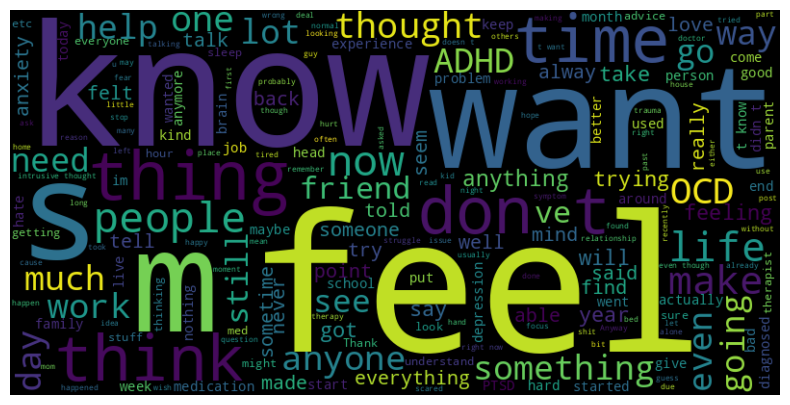

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = df_1['body'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
text = df_1['body'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()